****************************************************************************
* @file: ColorSegmentation.py
* @project: ROBOFEI-HT - FEI 😛
* @author: Vinicius Nicassio Ferreira
* @version: V0.0.1
* @created: 14/11/2017
* @e-mail: vinicius.nicassio@gmail.com
* @brief: Class ColorSegmentation
****************************************************************************

In [1]:
#ini-iPython

# Executando no diretório principal

In [2]:
import os
os.chdir('../../') #Executando no diretório principal
# os.system("cd Workbench/ && ./zerar.sh && cd ..")
os.system("cd Workbench/iPython/ && ./convertendo.sh && cd ../../")
import sys
sys.path.append('./include')
sys.path.append('./src')
sys.path.append('./Workbench/iPython')
#end-iPython

---- Imports ----

In [3]:
# Libraries to be used
import sys
#des-iPython sys.path.append('../include')
#des-iPython sys.path.append('../src')

In [4]:
# The standard libraries used in the vision system
from abc import ABCMeta, abstractmethod # Used to create abstract classes
from threading import Thread # Used to create classes with thread functions
import numpy as np
import cv2 # OpenCV library used for image processing.

In [5]:
# Used class developed by RoboFEI-HT
#ini-iPython - Usando Classe BasicProcesses como instanciação
os.system("sed -i '/@abstractmethod/d' ./Workbench/iPython/BasicProcesses.py")
os.system("sed -i '/__metaclass__/d' ./Workbench/iPython/BasicProcesses.py")
#end-iPython
from BasicProcesses import * # Standard and abstract class.
from VisionException import * # Used to handle exceptions

# ColorSegmentation
Class responsible for color segmentation.
doxygen-iPython

In [6]:
#des-iPython class ColorSegmentation(BasicProcesses):
#ini-tab -> Iniciando código classe

In [7]:
#ini-iPython - Lista de funções

#self-iPython __trackbarHMin
#self-iPython __trackbarHMax
#self-iPython __trackbarSMin
#self-iPython __trackbarSMax
#self-iPython __trackbarVMin
#self-iPython __trackbarVMax

# Lista de variaveis

#self-iPython _args
#self-iPython _confini

class argumentos:
    camera = False
    dnn = True
    train = False

a = argumentos()
#end-iPython - Fim listas

---- Variables ----

# show
.
doxygen-iPython

In [8]:
show = False #self-iPython show

# upper
Range maximum values.
doxygen-iPython

In [9]:
__upper = None #self-iPython __upper

# lower
Range minimum values.
doxygen-iPython

In [10]:
__lower = None #self-iPython __lower

# Color
Color to segmentaion.
doxygen-iPython

In [11]:
color = None #self-iPython color

# Parameters
Parameters used to perform color segmentation.
doxygen-iPython

In [12]:
__parameters = None #self-iPython __parameters

# Constructor Class
doxygen-iPython

In [13]:
#des-iPython def __init__(self, c, a, s):
#ini-tab -> Criando construtor
print 'Instantiating Basic Class' #debug-iPython
s = True #debug-iPython
color = "Green" #debug-iPython
show = s
color = c
#edes-iPython super(ColorSegmentation, self).__init__(a, color, "Segmentation", adreess="./Data/"+ color +".ini")
self = BasicProcesses(a, color, "Segmentation", adreess="./Data/"+ color +".ini")


# Creating default values and reading config
__parameters = {
    'h_min': 127,
    's_min': 0,
    'v_min': 0,
    'h_max': 127,
    's_max': 255,
    'v_max': 255,
    'color_b': 0,
    'color_g': 0,
    'color_r': 0,
    'name': color
}
__parameters = self._conf.readVariables(__parameters)

# define range of color in HSV
__lower = np.array([__parameters['h_min'], __parameters['s_min'], __parameters['v_min']])
__upper = np.array([__parameters['h_max'], __parameters['s_max'], __parameters['v_max']])
#end-tab -> Finalizando construtor

Instantiating Basic Class
GREEN - SEGMENTATION section not found!


In [14]:
#ini-iPython

## Testando construtor

In [15]:
__parameters['color_g'] = 255
__parameters
self._conf.end()
#end-iPython

In [16]:
#ini-iPython

## Imagens e funções para teste

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [18]:
def imshow(img):
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    plt.grid()
    plt.show()

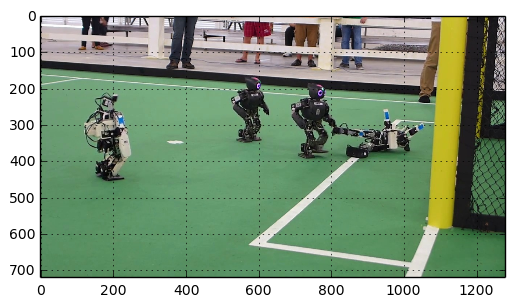

In [19]:
frame = cv2.imread("/home/vinicius/Dropbox/Projeto Mestrado/Codigos/RoboFEI-HT_Debug/AI/Vision/Workbench/iPython/Competicao.jpg")
imshow(frame)
#end-iPython

# trackbarHMin
Trackbar control function.
doxygen-iPython

In [20]:
#eself-iPython __trackbarHMin
#edes-iPython def __trackbarHMin(self, value):
def __trackbarHMin(value):
    global __lower #debug-iPython
    __parameters['h_min'] = min(
        value, # Read trackbar value
        __parameters['h_max'] - 1 # Minimum possible to be in range.
    )
    
    cv2.setTrackbarPos( # Adjusting value on trackbar
            'h_min', # Name of trackbar
            color + ' Segmentation', # Window Name
            __parameters['h_min'] # Value to be set
        )
    
    #Updating minimum vector
    __lower = np.array([
            __parameters['h_min'], # Min value to hue
            __parameters['s_min'], # Min value to saturation
            __parameters['v_min'] # Min value to value
        ]) #self-iPython __trackbarHMin

# trackbarHMax
Trackbar control function.
doxygen-iPython

In [21]:
#eself-iPython __trackbarHMax
#edes-iPython def __trackbarHMax(self, value):
def __trackbarHMax(value):
    global __upper #debug-iPython
    __parameters['h_max'] = max(
        value, # Read trackbar value
        __parameters['h_min'] + 1 # Maximum possible to be in range.
    )
    
    cv2.setTrackbarPos( # Adjusting value on trackbar
            'h_max', # Name of trackbar
            color + ' Segmentation', # Window Name
            __parameters['h_max'] # Value to be set
        )
    
    #Updating maximum vector
    __upper = np.array([
            __parameters['h_max'], # Max value to hue
            __parameters['s_max'], # Max value to saturation
            __parameters['v_max'] # Max value to value
        ]) #self-iPython __trackbarHMax

# trackbarSMin
Trackbar control function.
doxygen-iPython

In [22]:
#eself-iPython __trackbarSMin
#edes-iPython def __trackbarSMin(self, value):
def __trackbarSMin(value):
    global __lower #debug-iPython
    __parameters['s_min'] = min(
        value, # Read trackbar value
        __parameters['s_max'] - 1 # Minimum possible to be in range.
    )
    
    cv2.setTrackbarPos( # Adjusting value on trackbar
            's_min', # Name of trackbar
            color + ' Segmentation', # Window Name
            __parameters['s_min'] # Value to be set
        )
    
    #Updating minimum vector
    __lower = np.array([
            __parameters['h_min'], # Min value to hue
            __parameters['s_min'], # Min value to saturation
            __parameters['v_min'] # Min value to value
        ]) #self-iPython __trackbarSMin

# trackbarSMax
Trackbar control function.
doxygen-iPython

In [23]:
#eself-iPython __trackbarSMax
#edes-iPython def __trackbarSMax(self, value):
def __trackbarSMax(value):
    global __upper #debug-iPython
    __parameters['s_max'] = max(
        value, # Read trackbar value
        __parameters['s_min'] + 1 # Maximum possible to be in range.
    )
    
    cv2.setTrackbarPos( # Adjusting value on trackbar
            's_max', # Name of trackbar
            color + ' Segmentation', # Window Name
            __parameters['s_max'] # Value to be set
        )
    
    #Updating maximum vector
    __upper = np.array([
            __parameters['h_max'], # Max value to hue
            __parameters['s_max'], # Max value to saturation
            __parameters['v_max'] # Max value to value
        ]) #self-iPython __trackbarSMax

# trackbarVMin
Trackbar control function.
doxygen-iPython

In [24]:
#eself-iPython __trackbarVMin
#edes-iPython def __trackbarVMin(self, value):
def __trackbarVMin(value):
    global __lower #debug-iPython
    __parameters['v_min'] = min(
        value, # Read trackbar value
        __parameters['v_max'] - 1 # Minimum possible to be in range.
    )
    
    cv2.setTrackbarPos( # Adjusting value on trackbar
            'v_min', # Name of trackbar
            color + ' Segmentation', # Window Name
            __parameters['v_min'] # Value to be set
        )
    
    #Updating minimum vector
    __lower = np.array([
            __parameters['h_min'], # Min value to hue
            __parameters['s_min'], # Min value to saturation
            __parameters['v_min'] # Min value to value
        ]) #self-iPython __trackbarVMin

# trackbarVMax
Trackbar control function.
doxygen-iPython

In [25]:
#eself-iPython __trackbarVMax
#edes-iPython def __trackbarVMax(self, value):
def __trackbarVMax(value):
    global __upper #debug-iPython
    __parameters['v_max'] = max(
        value, # Read trackbar value
        __parameters['v_min'] + 1 # Maximum possible to be in range.
    )
    
    cv2.setTrackbarPos( # Adjusting value on trackbar
            'v_max', # Name of trackbar
            color + ' Segmentation', # Window Name
            __parameters['v_max'] # Value to be set
        )
    
    #Updating maximum vector
    __upper = np.array([
            __parameters['h_max'], # Max value to hue
            __parameters['s_max'], # Max value to saturation
            __parameters['v_max'] # Max value to value
        ]) #self-iPython __trackbarVMax

# segmentation
Function that performs the segmentation of a given color and returns a mask
doxygen-iPython

In [26]:
#edes-iPython def segmentation(self, img):
def segmentation(img):
    global show #debug-iPython
    # Color segmentation
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, __lower, __upper)
    
    if show == False:
        return mask
    else:
        blank_image = np.zeros(
            img.shape,
            np.uint8
        )
        
        blank_image[:,:,0] = __parameters['color_b']
        blank_image[:,:,1] = __parameters['color_g']
        blank_image[:,:,2] = __parameters['color_r']
        
        img = cv2.bitwise_and(
            img,
            img,
            blank_image,
            mask = 255 - mask
        )
        
        scale = max(860.0/img.shape[1], 640.0/img.shape[0])
        if scale > 0:
            scale = min(860.0/img.shape[1], 640.0/img.shape[0])
        
        img =cv2.resize(
            img,
            (0, 0),
            fx=scale,
            fy=scale
        )
        
        cv2.imshow(
            color + ' Segmentation',
            img
        )
        
        if show == True and show != "":
            show = ""
            cv2.createTrackbar(
                'h_min',
                color + ' Segmentation',
                __parameters['h_min'],
                255,
                __trackbarHMin,
            )

            cv2.createTrackbar(
                'h_max',
                color + ' Segmentation',
                __parameters['h_max'],
                255,
                __trackbarHMax,
            )

            cv2.createTrackbar(
                's_min',
                color + ' Segmentation',
                __parameters['s_min'],
                255,
                __trackbarSMin,
            )

            cv2.createTrackbar(
                's_max',
                color + ' Segmentation',
                __parameters['s_max'],
                255,
                __trackbarSMax,
            )

            cv2.createTrackbar(
                'v_min',
                color + ' Segmentation',
                __parameters['v_min'],
                255,
                __trackbarVMin,
            )

            cv2.createTrackbar(
                'v_max',
                color + ' Segmentation',
                __parameters['v_max'],
                255,
                __trackbarVMax,
            )
        
        return mask

In [27]:
#ini-iPython

## Teste segmentation

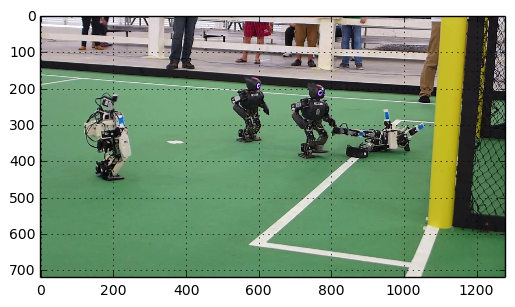

{'color_b': 0,
 'color_g': 255,
 'color_r': 0,
 'h_max': 255,
 'h_min': 0,
 'name': 'Green',
 's_max': 255,
 's_min': 0,
 'v_max': 255,
 'v_min': 0}

In [28]:
__lower = np.array([__parameters['h_min'], __parameters['s_min'], __parameters['v_min']])
__upper = np.array([__parameters['h_max'], __parameters['s_max'], __parameters['v_max']])

show = True

mask = segmentation(frame.copy())
imshow(cv2.bitwise_and(frame.copy(), frame.copy(), mask = 255 - mask))
cv2.waitKey(0) #debug-iPython
cv2.destroyAllWindows() #debug-iPython
__parameters
#end-iPython

In [29]:
#ini-iPython

## Testando while

In [30]:
__lower = np.array([__parameters['h_min'], __parameters['s_min'], __parameters['v_min']])
__upper = np.array([__parameters['h_max'], __parameters['s_max'], __parameters['v_max']])

show = True
while True:
    cv2.imshow('Frame', frame.copy())
    mask = segmentation(frame.copy())
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows() #debug-iPython
__parameters
#end-iPython

{'color_b': 0,
 'color_g': 255,
 'color_r': 0,
 'h_max': 179,
 'h_min': 122,
 'name': 'Green',
 's_max': 123,
 's_min': 39,
 'v_max': 255,
 'v_min': 80}

In [31]:
#ini-iPython

## Teste end

In [32]:
self._end()
#end-iPython

In [33]:
#end-tab -> Fim código classe